In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pow, exp, pi, e

# Exercise 1. (a)

In [2]:
def conditional(y, mu, sigma):
    return (1/sqrt(2*pi*pow(sigma,2))) * pow(e, pow(y-mu,2) / (-2*pow(sigma,2)) )

def marginal(y, mus, sigma):
    density = 0
    for mu in mus:
        density += conditional(y, mu, sigma)
    return density

In [3]:
min_y = np.amin(-6)
max_y = np.amax(7.5)
y_range = np.linspace(float(min_y), float(max_y), 30000)

In [4]:
mus = [1, 2]

cond1 = []
cond2 = []
marg = []

for y in y_range: 
    cond1.append(conditional(y, mus[0], 2))
    cond2.append(conditional(y, mus[1], 2))
    marg.append(marginal(y, mus, 2))

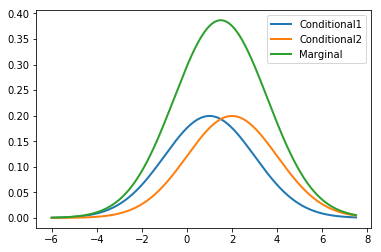

In [5]:
plt.plot(y_range, cond1, lw=2, label="Conditional1")
plt.plot(y_range, cond2, lw=2, label="Conditional2")
plt.plot(y_range, marg, lw=2, label="Marginal")
plt.legend()
plt.show()

# Exercise 1. (b)

In [6]:
def posterior(mu, sigma):
    return (0.5 * conditional(y=1, mu=mu, sigma=sigma)) / marginal(y=1, mus=mus, sigma=sigma)

posterior(mu=1, sigma=2)

0.26560468668687814

# Exercise 1. (c)

In [7]:
min_sigma = np.amin(0.5)
max_sigma = np.amax(3)
sigma_range = np.linspace(float(min_sigma), float(max_sigma), 5).tolist()

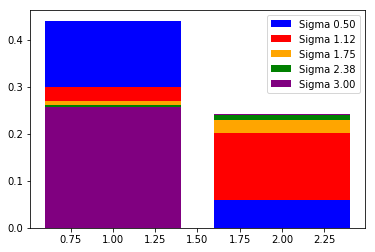

In [8]:
colors = ["blue", "red", "orange", "green", "purple"]

for i in range(len(sigma_range)):
    plt.bar(1, posterior(1, sigma_range[i]), label="Sigma {:.2f}".format(sigma_range[i]), color=colors[i])
    
sigma_range.reverse()
colors.reverse()

for i in range(len(sigma_range)):
    plt.bar(2, posterior(2, sigma_range[i]), color=colors[i])
    
plt.legend()
plt.show()